In [1]:
# Step 1: Load the annthyroid dataset and explore basic info

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = "annthyroid_unsupervised_anomaly_detection.csv"

df = pd.read_csv(data_path, sep=";")
df.columns = df.columns.str.strip().str.replace(";", "", regex=False)

df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])
X = df_clean.drop(columns=["Outlier_label"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


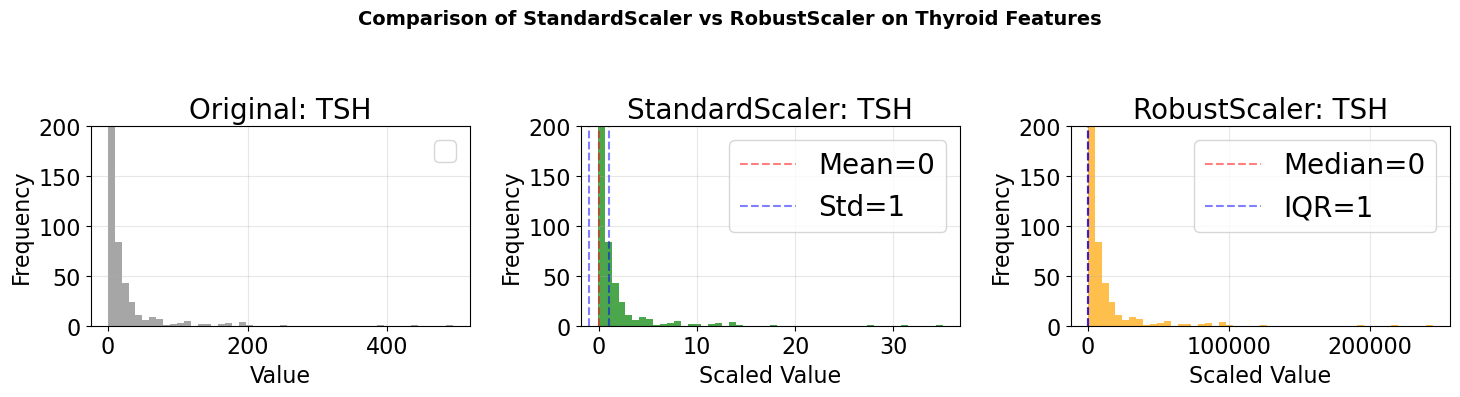


📊 Scaler Comparison Statistics:

TSH:
  Original: Mean=1.60, Std=14.05, Skew=19.26
  StandardScaler: Mean=0.00, Std=1.00, Skew=19.26
  RobustScaler: Median=0.00, IQR=1.00, Skew=19.26


In [2]:

from sklearn.preprocessing import StandardScaler, RobustScaler
plt.rcParams.update({
        'font.size': 20,           # 默认字体大小
        'axes.titlesize': 20,      # 子图标题大小
        'axes.labelsize': 16,      # 坐标轴标签大小
        'xtick.labelsize': 16,     # x轴刻度标签大小
        'ytick.labelsize': 16,     # y轴刻度标签大小
        'legend.fontsize': 20,     # 图例字体大小
        'figure.titlesize': 20     # 总标题大小
    })
def compare_scalers_distribution(X, num_cols, binary_cols=None, n_cols_to_show=4):
    """
    对比StandardScaler和RobustScaler的分布效果
    """
    if binary_cols is None:
        binary_cols = []
    
    # 只取数值型列
    numeric_cols = [col for col in num_cols if col not in binary_cols]
    
    # 选择最有代表性的几列（比如激素相关的）
    hormone_cols = ['TSH']  # 调整为你实际有的列
    cols_to_show = [col for col in hormone_cols if col in numeric_cols][:n_cols_to_show]
    
    if not cols_to_show:
        cols_to_show = numeric_cols[:n_cols_to_show]
    
    # 应用两种scaler
    scaler_standard = StandardScaler()
    scaler_robust = RobustScaler()
    
    X_standard = scaler_standard.fit_transform(X[numeric_cols])
    X_robust = scaler_robust.fit_transform(X[numeric_cols])
    
    # 再进行log变换
    # X_standard = np.log1p(X_standard)# - X_standard.min() + 1)  # 保证非负
    # X_robust = np.log1p(X_robust)# - X_robust.min() + 1)  # 保证非负
    # X[numeric_cols] = np.log1p(X[numeric_cols])
    # 创建对比图
    # 调整字体大小
    
    fig, axes = plt.subplots(len(cols_to_show), 3, figsize=(15, 4*len(cols_to_show)))
    
    for idx, col_name in enumerate(cols_to_show):
        col_idx = numeric_cols.index(col_name)
        
        # 原始数据
        ax0 = axes[idx, 0] if len(cols_to_show) > 1 else axes[0]
        ax0.hist(X[numeric_cols].iloc[:, col_idx], bins=50, alpha=0.7, color='gray')
        ax0.set_title(f'Original: {col_name}')
        ax0.set_xlabel('Value')
        ax0.set_ylabel('Frequency')
        ax0.legend()
        ax0.set_ylim(0, 200)
        ax0.grid(True, alpha=0.3)
        
        # StandardScaler
        ax1 = axes[idx, 1] if len(cols_to_show) > 1 else axes[1]
        ax1.hist(X_standard[:, col_idx], bins=50, alpha=0.7, color='green')
        ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Mean=0')
        ax1.axvline(x=1, color='blue', linestyle='--', alpha=0.5, label='Std=1')
        ax1.axvline(x=-1, color='blue', linestyle='--', alpha=0.5)
        ax1.set_title(f'StandardScaler: {col_name}')
        ax1.set_xlabel('Scaled Value')
        ax1.set_ylabel('Frequency')
        ax1.set_ylim(0, 200)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # RobustScaler
        ax2 = axes[idx, 2] if len(cols_to_show) > 1 else axes[2]
        ax2.hist(X_robust[:, col_idx], bins=50, alpha=0.7, color='orange')
        ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Median=0')
        ax2.axvline(x=1, color='blue', linestyle='--', alpha=0.5, label='IQR=1')
        ax2.axvline(x=-1, color='blue', linestyle='--', alpha=0.5)
        ax2.set_title(f'RobustScaler: {col_name}')
        ax2.set_xlabel('Scaled Value')
        ax2.set_ylabel('Frequency')
        ax2.set_ylim(0, 200)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    plt.suptitle('Comparison of StandardScaler vs RobustScaler on Thyroid Features', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    # 保存图片
    plt.savefig('scaler_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 输出统计信息
    print("\n📊 Scaler Comparison Statistics:")
    print("="*60)
    for col_name in cols_to_show:
        col_idx = numeric_cols.index(col_name)
        orig_data = X[numeric_cols].iloc[:, col_idx]
        std_data = X_standard[:, col_idx]
        robust_data = X_robust[:, col_idx]
        
        print(f"\n{col_name}:")
        print(f"  Original: Mean={orig_data.mean():.2f}, Std={orig_data.std():.2f}, "
              f"Skew={orig_data.skew():.2f}")
        print(f"  StandardScaler: Mean={std_data.mean():.2f}, Std={std_data.std():.2f}, Skew={pd.Series(std_data).skew():.2f}")
        print(f"  RobustScaler: Median={np.median(robust_data):.2f}, "
              f"IQR={np.percentile(robust_data, 75)-np.percentile(robust_data, 25):.2f}, Skew={pd.Series(robust_data).skew():.2f}")

# 使用示例
num_cols = ['TSH', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
binary_cols = ['Sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
               'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
               'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']

compare_scalers_distribution(df, num_cols, binary_cols, n_cols_to_show=4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


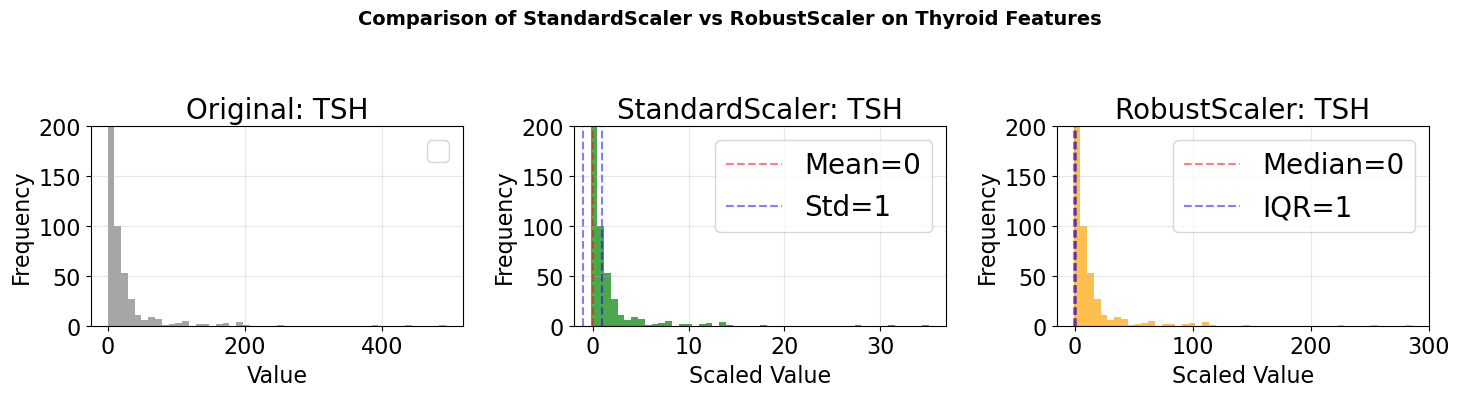


📊 Scaler Comparison Statistics:

TSH:
  Original: Mean=3.24, Std=13.99, Skew=19.18
  StandardScaler: Mean=-0.00, Std=1.00, Skew=19.18
  RobustScaler: Median=0.00, IQR=1.00, Skew=19.18


In [3]:
df = pd.read_csv("thyroid_processed_data_cleaned.csv")
compare_scalers_distribution(df, num_cols, binary_cols, n_cols_to_show=4)